In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                'class']

data = data.drop(['fnlwgt', 'education-num'], axis=1)

data = data.replace(' ?', np.nan)

seed=0
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
print(data['class'].value_counts())

 <=50K    24720
 >50K      7841
Name: class, dtype: int64


In [ ]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 32561
Number of attributes = 13
Number of missing values:
	age: 0
	workclass: 1836
	education: 0
	marital-status: 0
	occupation: 1843
	relationship: 0
	race: 0
	sex: 0
	capital-gain: 0
	capital-loss: 0
	hours-per-week: 0
	native-country: 583
	class: 0


In [ ]:
for col in ['workclass', 'occupation', 'native-country']:
    data[col].fillna(data[col].mode()[0])

In [ ]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 32561
Number of rows after discarding missing values = 30162


In [ ]:
print('Number of rows before discarding duplicates = %d' % (data2.shape[0]))
data3=data2.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data3.shape[0]))

num_data=data3[['age','capital-gain','capital-loss','hours-per-week']]

Number of rows before discarding duplicates = 30162
Number of rows after discarding duplicates = 26904


In [ ]:
def inds_outliers(df):
    
    df = df[df.columns[:-1]]
    Z = (df-df.mean())/df.std()
    inlier_inds = (((Z > -3)) & ((Z <= 3)))
    outlier_inds = ~inlier_inds

    # print('Found {} rows that were outliers.'.format(outlier_inds.sum()))
    return outlier_inds
outliers=inds_outliers(num_data)
for k in outliers.columns:
 data3=data3[~outliers[k]]

<ipython-input-7-7eac632e4161>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data3=data3[~outliers[k]]


In [ ]:
data3

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
data3

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


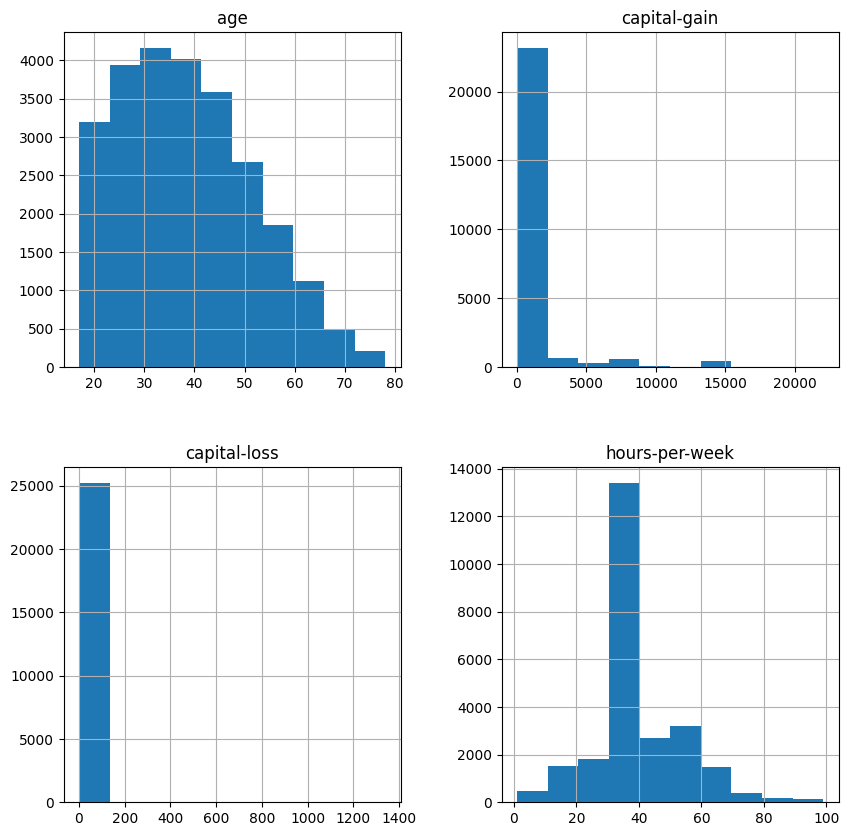

In [ ]:
distribution = data3.hist()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of the Adult income dataset')

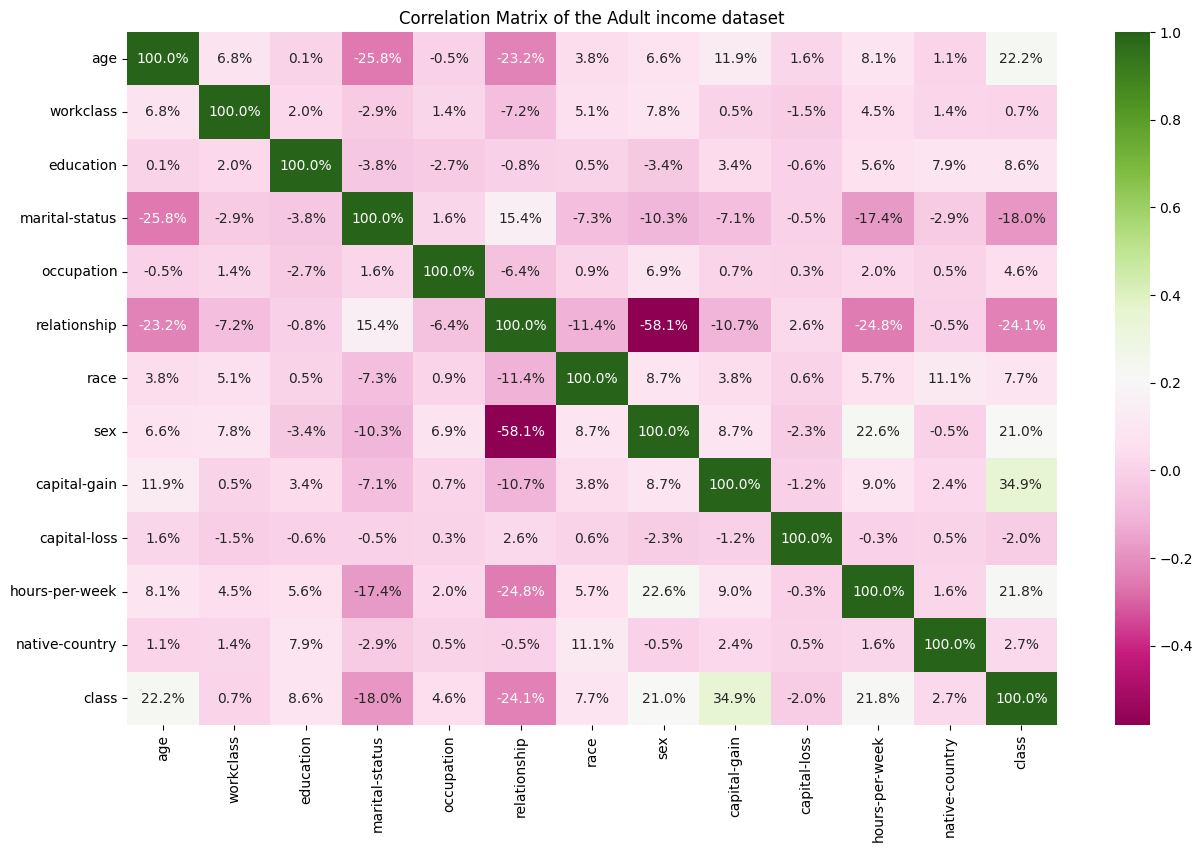

In [ ]:
# print(data3.corr())
  
# # plotting correlation heatmap
# dataplot = sb.heatmap(data3.corr(), cmap="YlGnBu", annot=True)
  
# # displaying heatmap
# plt.show()
# # matrix=data3.corr()
# # sns.set(rc = {'figure.figsize':(200,50)})
# # sns.heatmap(matrix, annot=True)
# # plt.show()

dataFrameCorelation = data3.apply(LabelEncoder().fit_transform)
fig, ax = plt.subplots(figsize=(15,9))
colormap = sns.color_palette("Greens")

sns.heatmap(dataFrameCorelation.corr(),cmap="PiYG",ax=ax, annot=True, fmt="0.1%")
ax.set_title('Correlation Matrix of the Adult income dataset')

In [ ]:
label_encoder = LabelEncoder()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# df['species'] = label_encoder.fit_transform(df['species'])
  
# Create correlation matrix
dataFrameCorelation = data3.apply(LabelEncoder().fit_transform)  
corr_mat=dataFrameCorelation.corr()
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)


sex             relationship     -0.581033
marital-status  age              -0.257866
hours-per-week  relationship     -0.248202
class           relationship     -0.241208
relationship    age              -0.231584
class           marital-status   -0.180114
hours-per-week  marital-status   -0.174249
race            relationship     -0.114150
capital-gain    relationship     -0.106804
sex             marital-status   -0.102928
race            marital-status   -0.072549
relationship    workclass        -0.072124
capital-gain    marital-status   -0.071335
relationship    occupation       -0.064017
marital-status  education        -0.038147
sex             education        -0.034068
native-country  marital-status   -0.029472
marital-status  workclass        -0.028982
occupation      education        -0.027094
capital-loss    sex              -0.023353
class           capital-loss     -0.020082
capital-loss    workclass        -0.014528
                capital-gain     -0.012212
relationshi

<ipython-input-12-0a2c5dc30973>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))


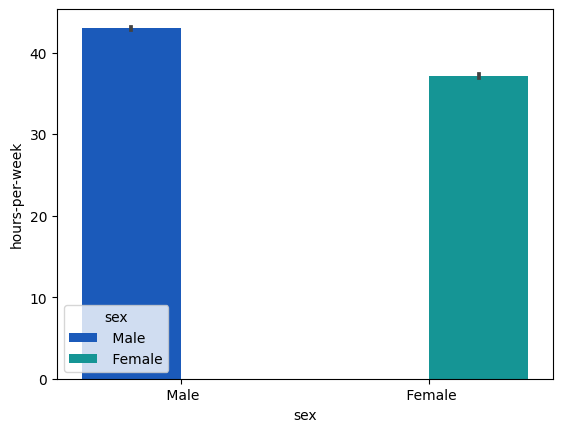

In [ ]:
# sns.set(style = 'whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x = data3['sex'], y = data3['hours-per-week'], data = data3,
             hue = 'sex', palette = 'winter');

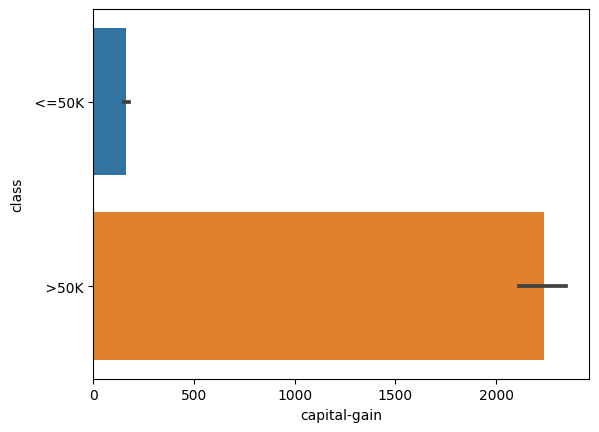

In [ ]:
sns.barplot(x = data3['capital-gain'], y = data3['class'], data = data3
              );

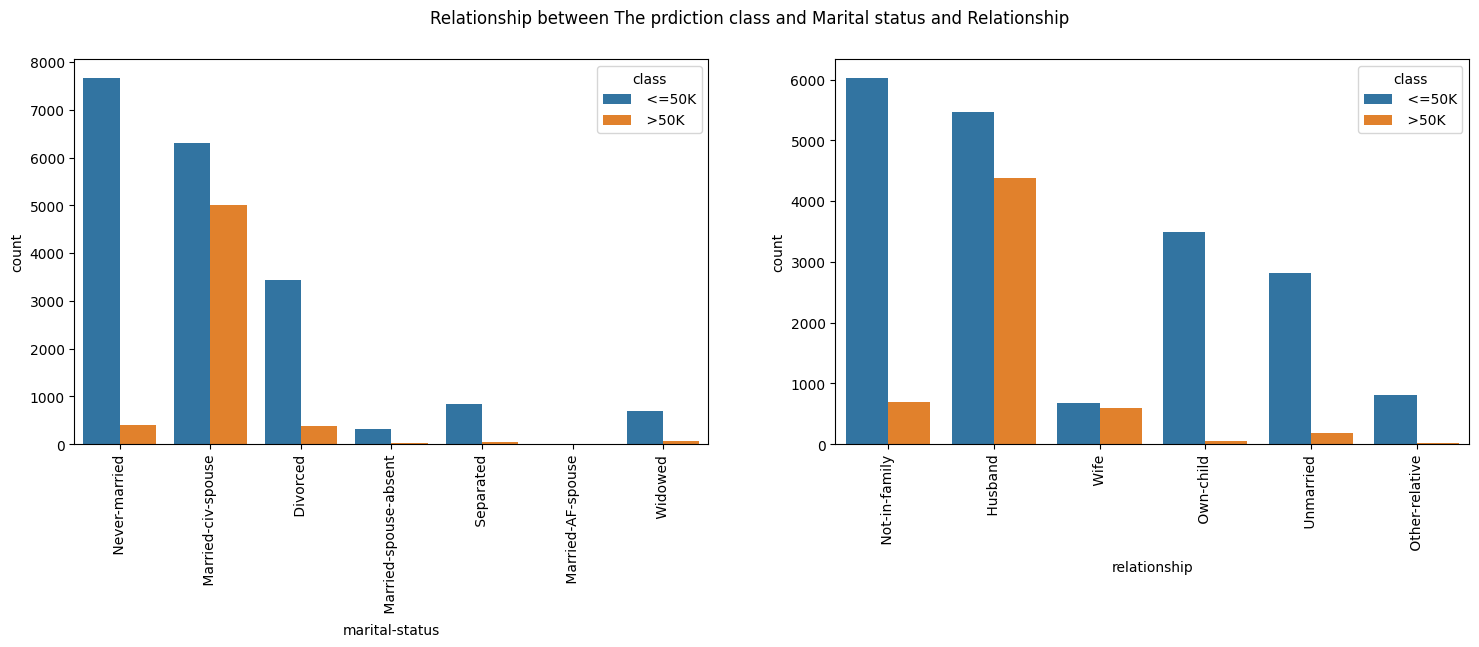

In [ ]:
from matplotlib import style
import warnings
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  fig, ax = plt.subplots(1,2,figsize=(18, 5))
  sns.countplot(ax=ax[0], x = 'marital-status', hue='class',data=data3)
  sns.countplot(ax=ax[1], x='relationship', hue='class', data=data3)
  fig.suptitle('Relationship between The prdiction class and Marital status and Relationship')
  ax[0].tick_params(axis='x', rotation=90)
  ax[1].tick_params(axis='x', rotation=90)
  
  plt.show()

In [ ]:
import plotly.express as px

fig = px.histogram(data3, x='marital-status', color='class', barmode='group', nbins=len(data3['marital-status'].unique()))
fig.update_layout(title='Relationship between The prdiction class and Marital status',
                  xaxis_title='Marital Status',
                  yaxis_title='Count')
fig.show()

fig = px.histogram(data3, x='relationship', color='class', barmode='group', nbins=len(data3['relationship'].unique()))
fig.update_layout(title='Relationship between The prdiction class and Relationship',
                  xaxis_title='Relationship',
                  yaxis_title='Count')
fig.show()


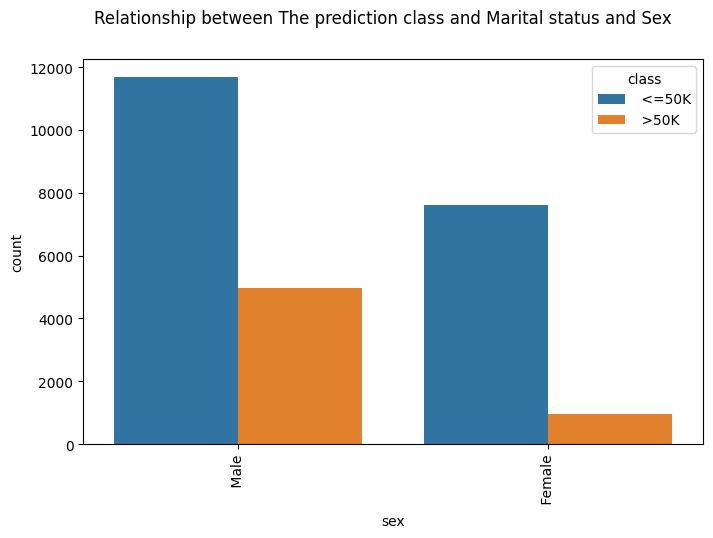

In [ ]:
from matplotlib import style
import warnings
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  fig, ax = plt.subplots(1,1,figsize=(8, 5))
  sns.countplot(ax=ax, x = 'sex', hue='class',data=data3)
  fig.suptitle('Relationship between The prediction class and Marital status and Sex')
  ax.tick_params(axis='x', rotation=90)
  plt.show()

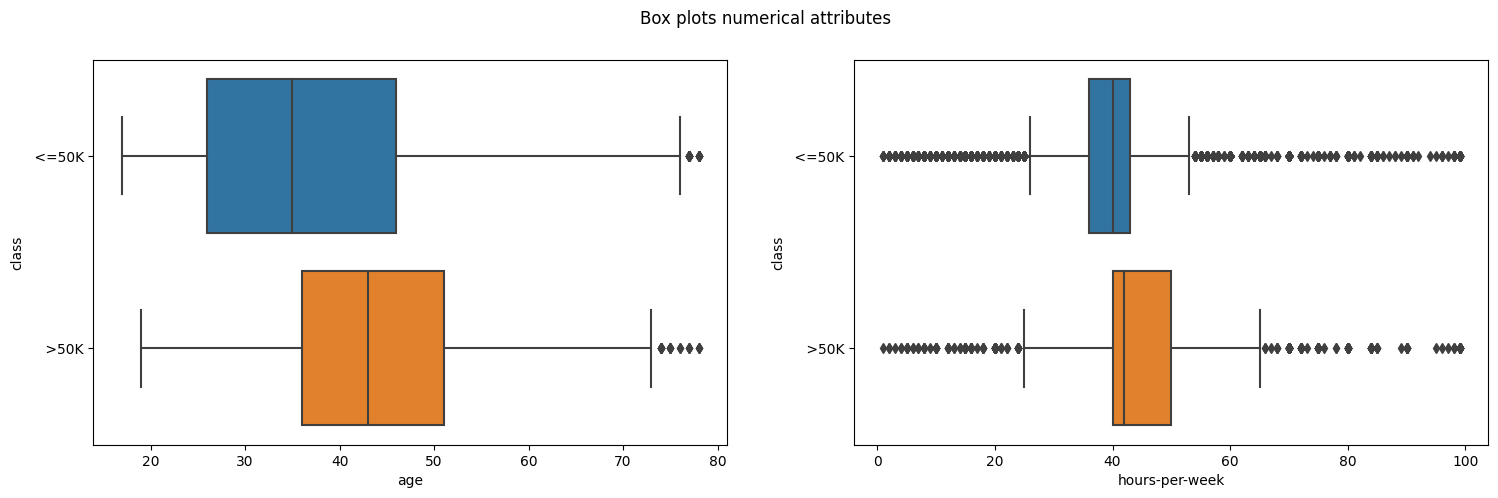

In [ ]:
from matplotlib import style
import warnings
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  fig, ax = plt.subplots(1,2,figsize=(18, 5))
  sns.boxplot(ax=ax[0],x='age', y='class',data=data3)
  sns.boxplot(ax=ax[1],x='hours-per-week', y='class',data=data3)
  # sns.countplot(ax=ax[1], x='relationship', hue='class', data=data3)
  fig.suptitle('Box plots numerical attributes ')
  # ax[0].tick_params(axis='x', rotation=90)
  # ax[1].tick_params(axis='x', rotation=90)
  
plt.show()










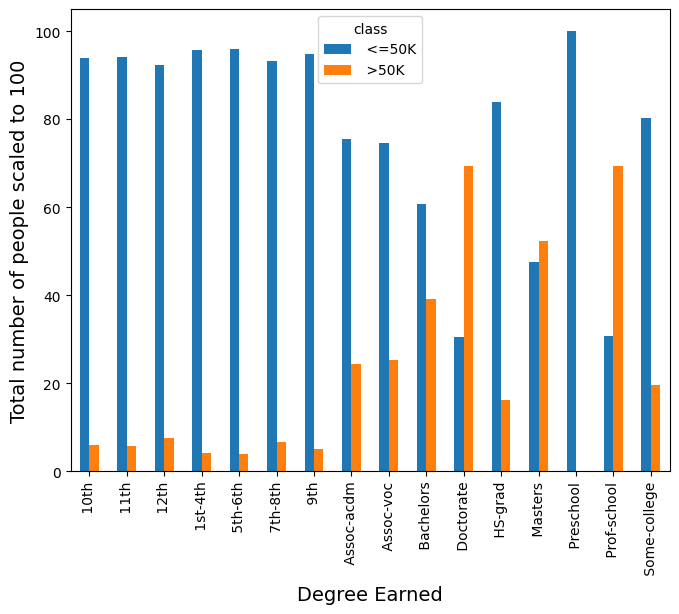

In [ ]:
table_edu = pd.crosstab(data3['education'], data3['class'])
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',ax =ax);
plt.xlabel('Degree Earned',fontsize = 14);
plt.ylabel('Total number of people scaled to 100',fontsize = 14);


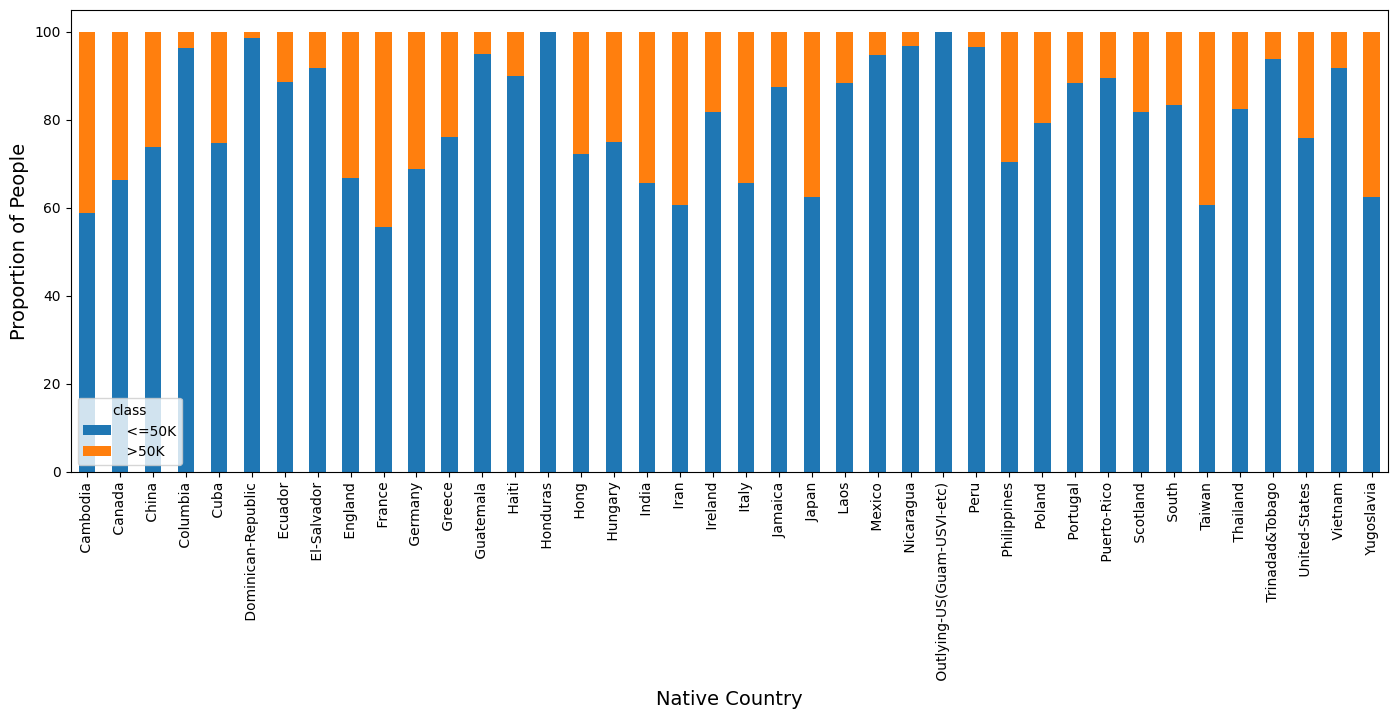

In [ ]:
table_country = pd.crosstab(data3['native-country'], data3['class'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

In [ ]:
ohe = pd.get_dummies(data=data3, columns=['workclass','education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
ohe

In [ ]:
A=ohe['class']
data_clean=ohe.drop('class',axis=1)



data_clean = (data_clean - data_clean.min()) / (data_clean.max() - data_clean.min())
#data_clean = data_clean * (1 - (-1)) + (-1)
data_clean

In [ ]:
data_clean['class']=A

data_clean['class'].isna().sum()

In [ ]:
X=data_clean.drop(['class'],axis=1)
y=data_clean['class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=seed)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

#parameters = {'max_depth':range(3,20),'criterion': ['gini','entropy,'log_loss'],}
param_grid = {'max_depth':range(3,20), 
              'criterion': ['gini','entropy'],
              'splitter':['best','random'],
              'min_samples_split':range(2,5)
             }
clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, n_jobs=4)#Default CV is used which inicates 5 fold cross validation
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=8,criterion='gini',splitter='best',min_samples_split=4)
clf = clf.fit(X_train, y_train)

predY = clf.predict(X_test)

from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predY)))

Accuracy on test data is 0.84
